# <a href="https://thetahat.ru/courses/ph-ds-2024-aut">Phystech@DataScience</a>
## Семинар 10 (Часть 1)

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

In [ ]:
# Bot check

# HW_ID: phds_sem10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', font_scale=1.3, palette='Set2')

%matplotlib inline

## Повторение

### Одновыборочный T-test

Дана одна выборка $X_1, ..., X_n$.

Критерий проверяет гипотезы

$\mathsf{H}_0\colon \mathsf{E} X = a_0$

$\mathsf{H}_1\colon \mathsf{E} X \not= a_0$

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp">`ttest_1samp`</a>`(a, popmean): statistic, pvalue`

* `a` &mdash; выборка
* `popmean` &mdash; равно $a_0$

In [2]:
sample = sps.norm(loc=0).rvs(size=100)
sps.ttest_1samp(sample, 0), sps.ttest_1samp(sample, 0.5)

(TtestResult(statistic=-0.6760949738107173, pvalue=0.5005567550285697, df=99),
 TtestResult(statistic=-4.924436158277967, pvalue=3.388087195146098e-06, df=99))

### Двухвыборочный T-test &mdash; независимые выборки

Даны две независимые выборки

* $X_1, ..., X_n$,

* $Y_1, ..., Y_m$.

Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon \mathsf{E} X_1 = \mathsf{E} X_2$

$\mathsf{H}_1\colon \mathsf{E} X_1 \not= \mathsf{E} X_2$

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind">`ttest_ind`</a>`(a, b, equal_var=True): statistic, pvalue`

`a`, `b` &mdash; выборка

`equal_var` &mdash; известно ли равенство дисперсий

In [3]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1).rvs(size=100)
sps.ttest_ind(sample_1, sample_2)

TtestResult(statistic=-7.9701044249124475, pvalue=1.2310350464297637e-13, df=198.0)

In [4]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1, scale=7).rvs(size=100)
sps.ttest_ind(sample_1, sample_2, equal_var=False)

TtestResult(statistic=-0.8494199621802881, pvalue=0.39762900320958683, df=102.40844136177331)

### Двухвыборочный T-test &mdash; связные выборки

Даны две связные выборки

* $X_1, ..., X_n$,

* $Y_1, ..., Y_n$.


Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon \mathsf{E} X_1 = \mathsf{E} X_2$

$\mathsf{H}_1\colon \mathsf{E} X_1 \not= \mathsf{E} X_2$

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">`ttest_rel`</a>`(a, b): statistic, pvalue`

`a`, `b` &mdash; выборка

In [5]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

TtestResult(statistic=0.3975249228231859, pvalue=0.691836231128828, df=99)

In [6]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0.5, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

TtestResult(statistic=-9.698990080569489, pvalue=4.963132667499758e-16, df=99)

### Пример: ирисы Фишера

Визуализация данных

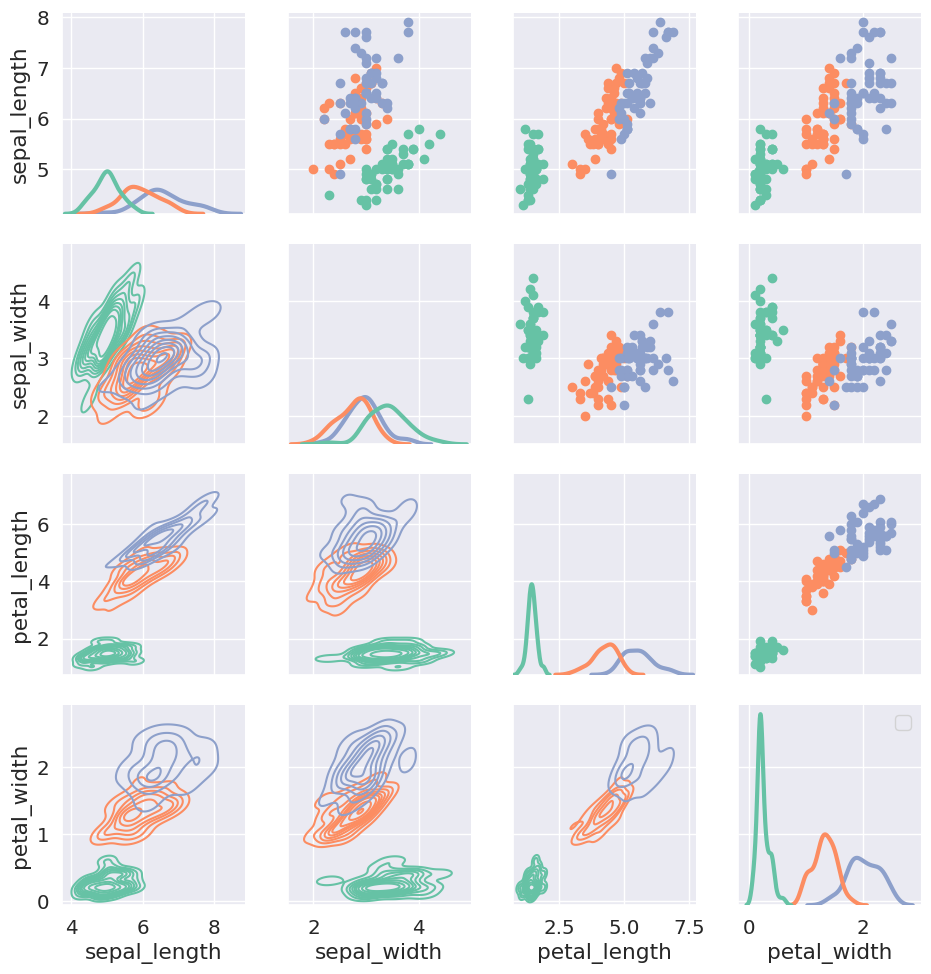

In [7]:
df = sns.load_dataset("iris")

g = sns.PairGrid(df, hue='species')
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.legend();

Как выглядят данные

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Виды ирисов

In [9]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Сравнение распределений параметров цветков

In [10]:
sps.ttest_ind(df[df.species == 'setosa'].sepal_length,
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

TtestResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17, df=86.53800179765497)

In [11]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_length,
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

TtestResult(statistic=5.629165259719801, pvalue=1.8661443873771216e-07, df=94.02548633776483)

In [12]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_width,
              df[df.species == 'versicolor'].sepal_width,
              equal_var=False)

TtestResult(statistic=3.2057607502218186, pvalue=0.001819483482104968, df=97.92682669979344)

*Замечание.* Строго говоря, неоходима поправка на множественное тестирование гипотез.

## AA-тесты: валидация критериев

Напишем функцию, реализующую относительный t-test. Функция возвращает значение статистики, доверительный интервал, p-value.

Для подсчёта статистики воспользуемся следующей формулой

$$R = \overline{X} / \overline{Y} - 1$$

где n &mdash; размер выборки.


Для подсчёта `p-value` найдите вероятность того, что стандартно распределённая случайная велечина имеет значение по модулю большее чем

$$z = \sqrt{n}\frac{|R|}{\sqrt{\frac{\overline{(X - \overline{X})^2}}{\overline{Y}^2} + \frac{\overline{(Y - \overline{Y})^2}\overline{X}^2}{\overline{Y}^4}}}$$

Вам понадобится функция `sps.norm.sf`, также Вам может помочь функция `np.var`.


Посчитайте доверительный интервал. Для этого найдите

$$q = \Phi^{-1}(1-\alpha/2)$$

где $\Phi$ &mdash; функция распределения стандартного нормального распределения (воспользуйтесь методом `sps.norm.ppf`), $\alpha$ &mdash; уровень значимости. Затем от $R$ отложите

$$\frac{q \cdot \sigma_R}{\sqrt{n}}$$

где $\sigma_R$ &mdash; знаменатель из формулы для расчёта $z$.

In [13]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    '''
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    stat = (x_mean / y_mean) - 1

    std = np.sqrt(
        (np.var(x, ddof=1) / y_mean**2) +
        (np.var(y, ddof=1) / y_mean**2)
    )

    z_stat = np.abs(stat) * np.sqrt(n) / std
    pvalue = 2 * sps.norm.sf(z_stat)

    q = sps.norm.ppf(1 - alpha / 2)
    left_bound = stat - q * std / np.sqrt(n)
    right_bound = stat + q * std / np.sqrt(n)

    return stat, pvalue, left_bound, right_bound

In [14]:
def draw_interval(
    real_alpha, left_bound, right_bound,
    alpha=0.05, new_fig=True
):
    '''
    Отрисовка интервала для вероятности отвержения критерия

    Аргументы:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы дов. интервала
    alpha -- теоретический уровень значимости
    new_fig -- coздавать ли новую matplotlib figure
    '''

    if new_fig:
        plt.figure(figsize=(7, 3.5))

    plt.hlines(0, 0, 1,
               color='black', lw=2, alpha=0.6)
    plt.vlines(alpha, -1, 1,
               color='red', lw=2, linestyle='--', alpha=0.6)
    plt.fill_between([left_bound, right_bound], [0.1]*2, [-0.1]*2,
                     color='green', alpha=0.6)
    plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
    plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
    plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
    plt.ylim((-0.5, 0.5))
    plt.yticks([])

In [18]:
def calculate_real_alpha(n_reject, n_iter, alpha=0.05):

    real_alpha = n_reject / n_iter
    q = sps.norm.ppf(1 - alpha / 2)
    left_bound = real_alpha - q * np.sqrt(real_alpha * (1 - real_alpha) / n_iter)
    right_bound = real_alpha + q * np.sqrt(real_alpha * (1 - real_alpha) / n_iter)

    return real_alpha, left_bound, right_bound

In [19]:
def AB_test(
    distr1, distr2, n_iter=10_000, sample_size=1_000, alpha=0.05
):
    '''
    Проведение серии AB-тестов на искусственных выборках.

    Аргументы:
    distr1, distr2 -- распределения для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- уровень значимости
    '''

    n_reject = 0  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        x = distr1.rvs(size=sample_size)
        y = distr2.rvs(size=sample_size)
        n_reject += (relative_ttest(x, y)[1] < alpha)

    # Реальный уровень значимости
    real_alpha, left_bound, right_bound = calculate_real_alpha(n_reject, n_iter)
    print('{:.4f} +/- {:.4f}'.format(
        real_alpha, (right_bound - left_bound)/2
    ))

    plt.figure(figsize=(14, 3.5))

    # График плотности распределений
    with sns.axes_style("darkgrid"):
        plt.subplot(1, 2, 1)
        for d, label in zip([distr1, distr2], ['A', 'B']):
            grid = np.linspace(d.ppf(0.005) - 0.2, d.ppf(0.995) + 0.2, 1000)
            plt.plot(grid, d.pdf(grid), label=label, lw=3)
        plt.legend()
        plt.title('Плотности выборок')

    # График интервала
    with sns.axes_style("whitegrid"):
        plt.subplot(1, 2, 2)
        draw_interval(
            real_alpha, left_bound, right_bound,
            alpha=alpha, new_fig=False
        )

    plt.tight_layout()

Проверим корректность критерия методом AA-тестирования на искусственных данных. Рассмотрите разные виды распределений и разный размер выборки. Представим полученные результаты в удобном виде.

In [20]:
n_iter = 20000  # количество итераций в одном эксперименте
alpha = 0.05  # уровень значимости

#### Экспоненциальное распределение

Проведем эксперименты для разных размеров выборок.

100%|██████████| 20000/20000 [00:13<00:00, 1528.84it/s]


0.0597 +/- 0.0033


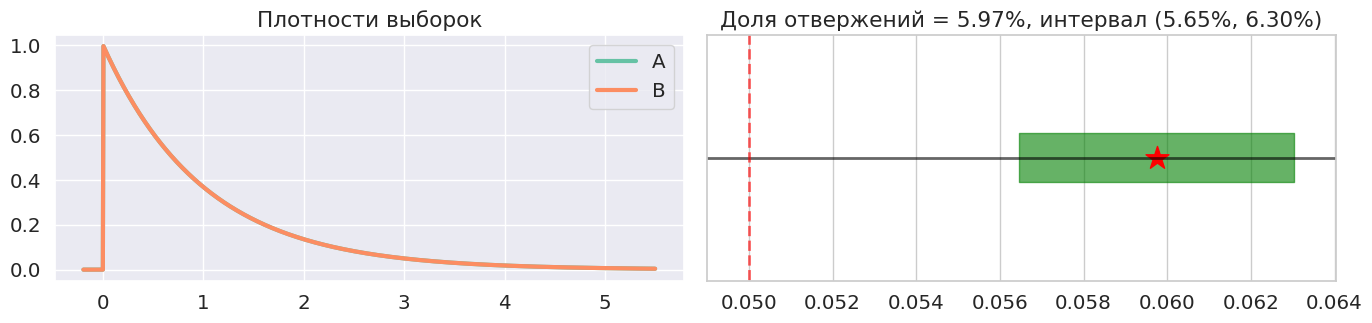

In [21]:
AB_test(sps.expon, sps.expon, n_iter=n_iter, sample_size=10, alpha=alpha)

100%|██████████| 20000/20000 [00:12<00:00, 1555.85it/s]


0.0514 +/- 0.0031


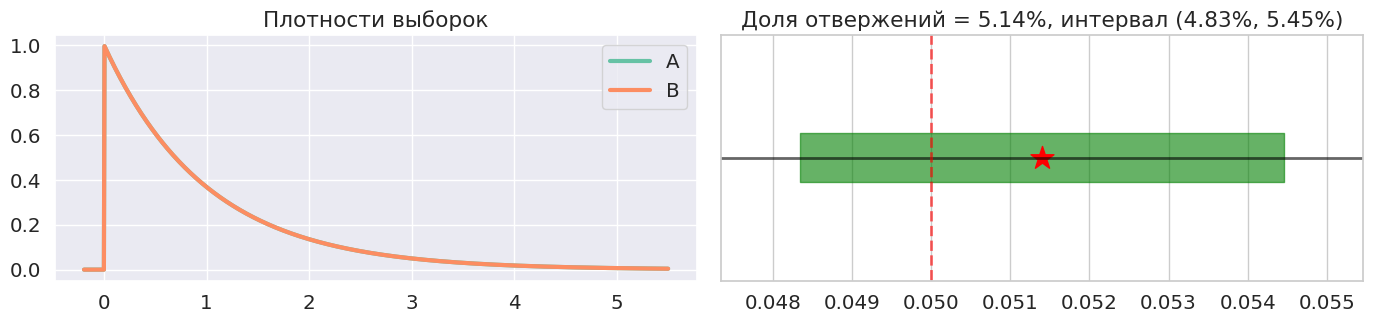

In [22]:
AB_test(sps.expon, sps.expon, n_iter=n_iter, sample_size=100, alpha=alpha)

100%|██████████| 20000/20000 [00:12<00:00, 1573.75it/s]


0.0477 +/- 0.0030


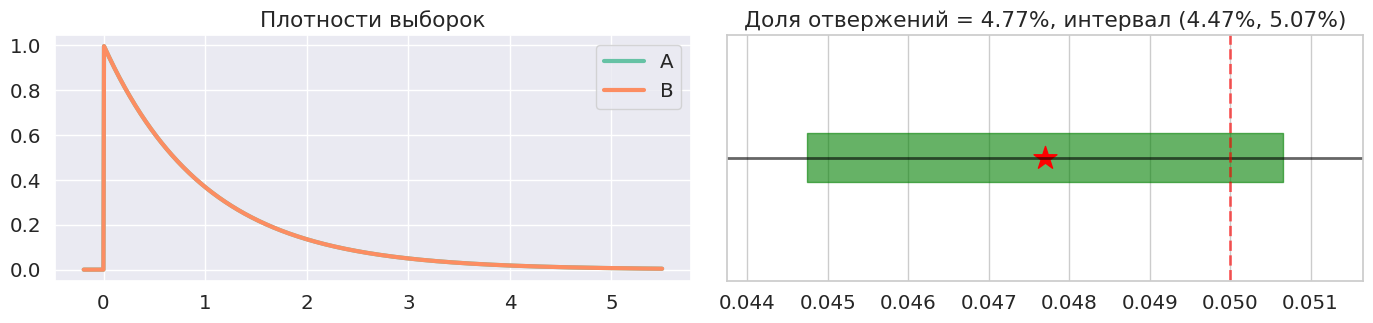

In [23]:
AB_test(sps.expon, sps.expon, n_iter=n_iter, sample_size=1_000, alpha=alpha)

100%|██████████| 20000/20000 [00:24<00:00, 827.74it/s]


0.0515 +/- 0.0031


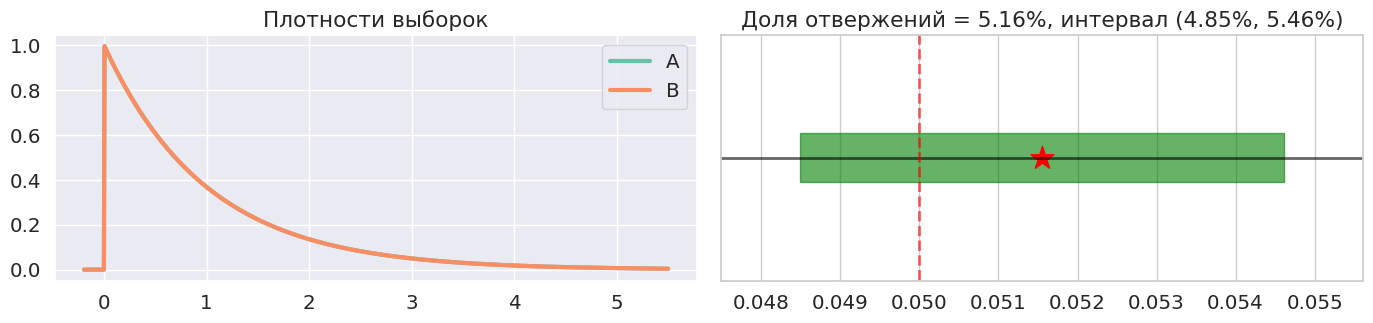

In [24]:
AB_test(sps.expon, sps.expon, n_iter=n_iter, sample_size=10_000, alpha=alpha)

доля отвержений сначала падает(потому что различий между выборками мало, тест становится более консервативным, и доля отвержений может уменьшается), потом увеличивается при sample_size=10_000

#### Гамма-распределение

Проведем эксперименты для разных размеров выборок.

100%|██████████| 20000/20000 [00:15<00:00, 1294.04it/s]


0.0633 +/- 0.0034


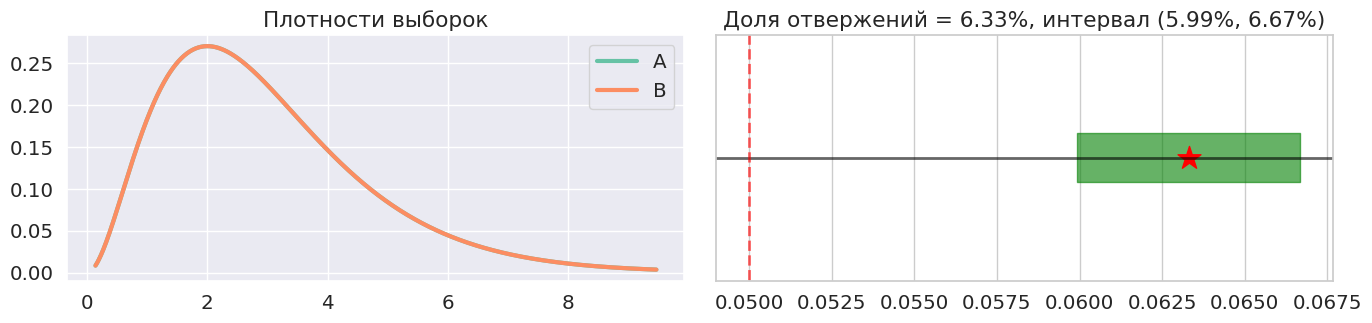

In [25]:
AB_test(sps.gamma(a=3), sps.gamma(a=3), n_iter=n_iter, sample_size=10, alpha=alpha)

100%|██████████| 20000/20000 [00:13<00:00, 1533.13it/s]


0.0525 +/- 0.0031


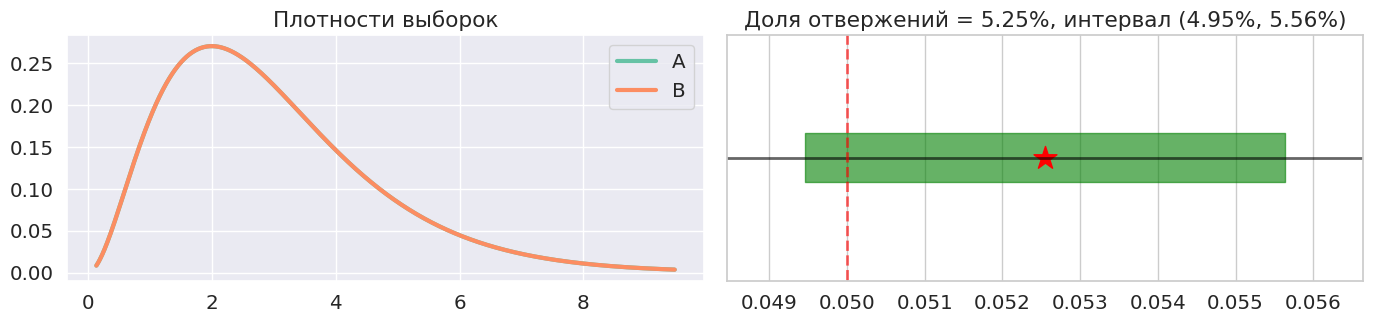

In [26]:
AB_test(sps.gamma(a=3), sps.gamma(a=3), n_iter=n_iter, sample_size=100, alpha=alpha)

100%|██████████| 20000/20000 [00:42<00:00, 473.63it/s]


0.0495 +/- 0.0030


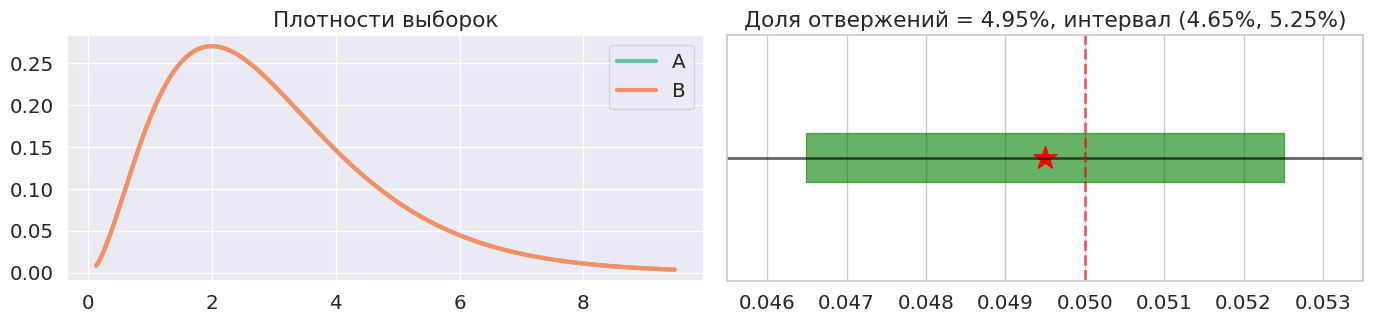

In [27]:
AB_test(sps.gamma(a=3), sps.gamma(a=3), n_iter=n_iter, sample_size=10_000, alpha=alpha)

тут аналогично

#### Распределение Коши

Проведем эксперименты для разных размеров выборок.

100%|██████████| 20000/20000 [00:14<00:00, 1376.00it/s]


0.0208 +/- 0.0020


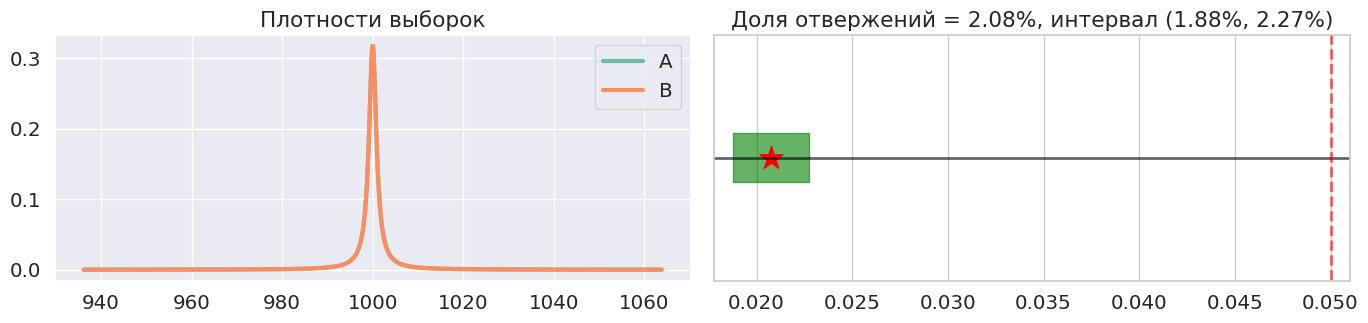

In [28]:
AB_test(sps.cauchy(loc=1000), sps.cauchy(loc=1000), n_iter=n_iter, sample_size=1000, alpha=alpha)

#### Нормальное распределение

Проведем эксперименты для разных размеров выборок.

100%|██████████| 20000/20000 [00:12<00:00, 1629.43it/s]


0.0493 +/- 0.0030


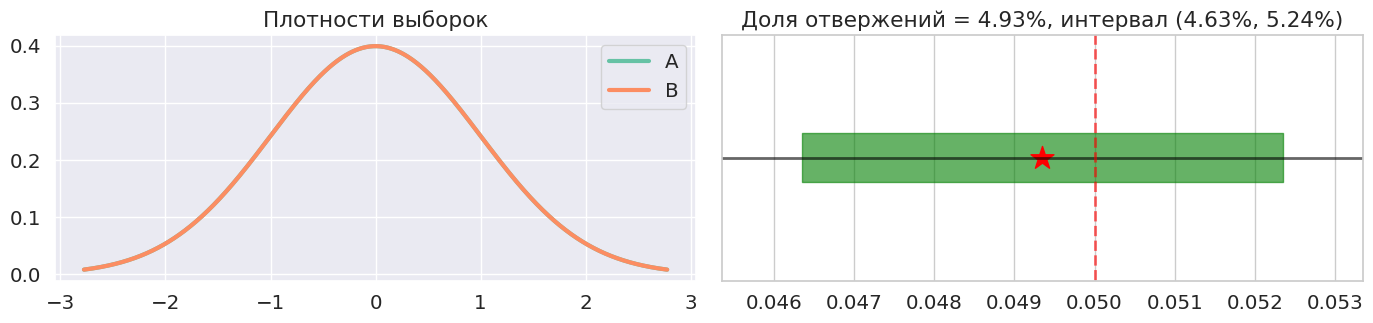

In [29]:
AB_test(sps.norm, sps.norm, n_iter=n_iter, sample_size=100, alpha=alpha)

100%|██████████| 20000/20000 [00:12<00:00, 1548.03it/s]


0.0520 +/- 0.0031


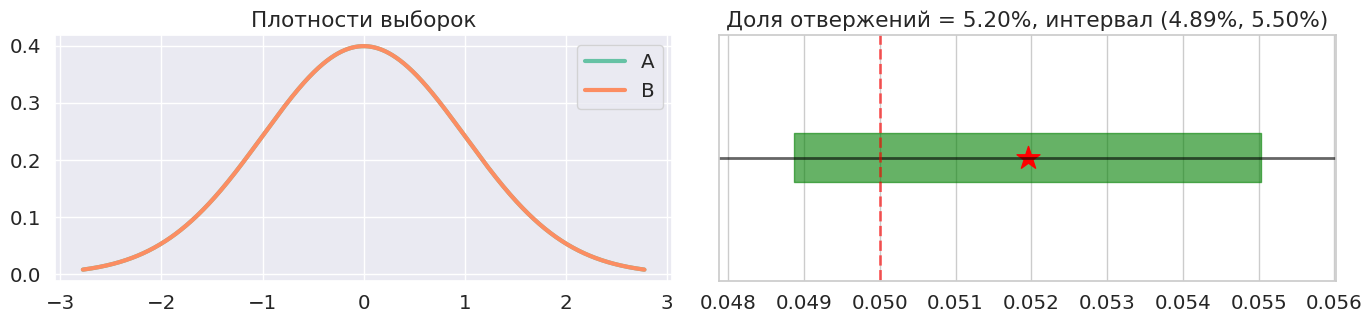

In [30]:
AB_test(sps.norm, sps.norm, n_iter=n_iter, sample_size=1_000, alpha=alpha)

**Вывод:**

#### Мощность для распределения

Зафиксируйте тип распределения и размер выборки. Исследуйте мощность критерия с помощью добавления смещения к одной из выборок.

In [31]:
alpha=0.05

100%|██████████| 20000/20000 [00:13<00:00, 1512.20it/s]


0.0520 +/- 0.0031


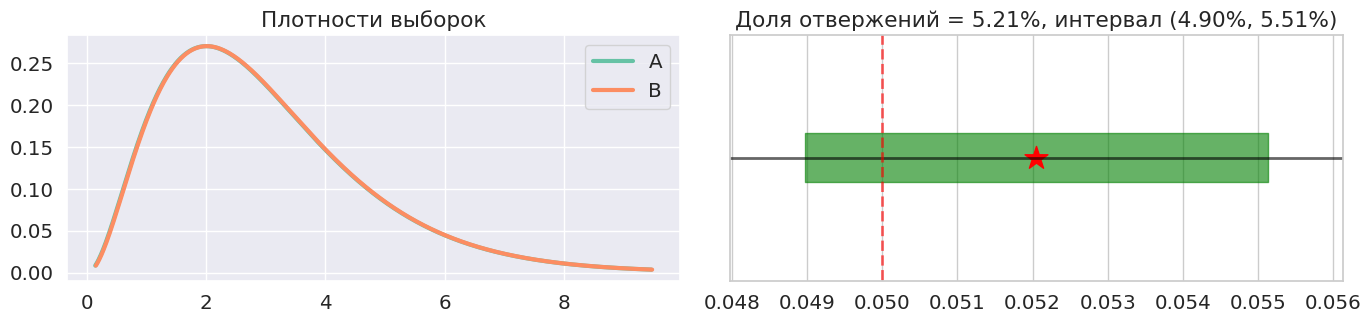

In [32]:
AB_test(sps.gamma(a=3), sps.gamma(a=3, loc=0.01), n_iter=n_iter, sample_size=100, alpha=alpha)

100%|██████████| 20000/20000 [00:14<00:00, 1382.97it/s]


0.0712 +/- 0.0036


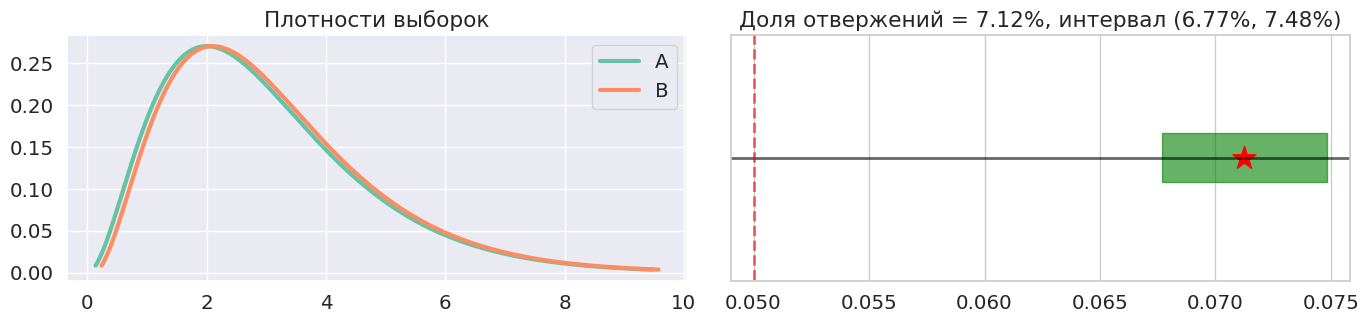

In [33]:
AB_test(sps.gamma(a=3), sps.gamma(a=3, loc=0.1), n_iter=n_iter, sample_size=100, alpha=alpha)

100%|██████████| 20000/20000 [00:13<00:00, 1531.47it/s]


0.9804 +/- 0.0019


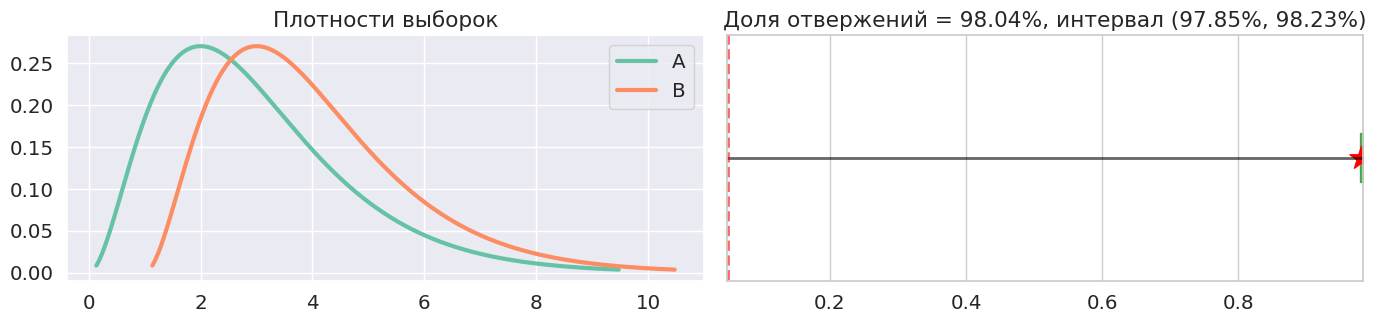

In [34]:
AB_test(sps.gamma(a=3), sps.gamma(a=3, loc=1), n_iter=n_iter, sample_size=100, alpha=alpha)

из-за различия выборок в смещении тест становится более чувствительным и лучше отвергает.

Рассмотрим сетку значений сдвига

In [35]:
n_reject = []  # количество отвержений H_0
sample_size = 1000
shifts = np.linspace(0, 0.5, 21)

for loc in tqdm(shifts):
    n_reject.append(0)
    for _ in range(n_iter):
        x = sps.gamma.rvs(a=3, size=sample_size)
        y = sps.gamma.rvs(a=3, size=sample_size) + loc
        n_reject[-1] += relative_ttest(x, y)[3] < alpha

100%|██████████| 21/21 [05:03<00:00, 14.46s/it]


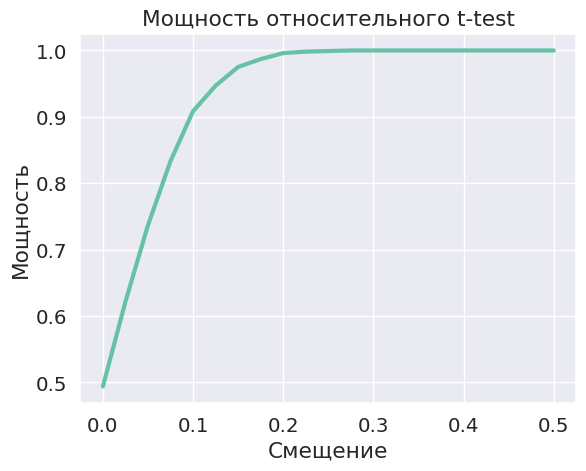

In [37]:
plt.plot(shifts, np.array(n_reject)/n_iter, lw=3)
plt.title('Мощность относительного t-test')
plt.xlabel('Смещение')
plt.ylabel('Мощность');

**Вывод:** как и ожидалось, мощность растет, потому что из-за смещения увеличивается раличие между группами